# Neural Network Model 
##### Import all the necessary libraries

In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

##### Path to both the training csv and evaluation csv
##### If you have dataset and don't know how to make dataset csv, look at my previous video.

In [3]:
#Path to training and evaluation csv
training_csv_path = r'PATH_TO_TRAINING_CSV' 
eval_csv_path = r'PATH_TO_EVALUATION_CSV'


##### Define functions 
###### read_and_decode - to read all the images from a given path, change from 0-255 to 0-1 and resize then to a fixed height and width
###### decode_csv - use later to parse in the csv. Will use read_and_decode to return resized image with the label
###### show_image - use read_and_decode and plot the image

In [4]:
# Height and width to standarise all images
IMG_HEIGHT = 256
IMG_WIDTH = 256
RESHAPE_DIM = [IMG_HEIGHT, IMG_WIDTH]

#class names 
CLASS_NAMES = ['cats', 'dogs'] #NEED TO CHANGE

#function to read the image and convert the image between 0 - 1.
#Also, reshae the image to the defined height and width
def read_and_decode(filename, RESHAPE_DIM):
    img = tf.io.read_file(filename)
    img = tf.io.decode_jpeg(img, channels = 3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, RESHAPE_DIM)

#Read the image path and label from the csv files. Along wiith the label in one hot encoded or sparse 
def decode_csv(csv_row):
    record_defaults = ["path", "label"]
    filename, label = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename, RESHAPE_DIM)  
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label))  #tf.math.equal(CLASS_NAMES, label) only then use categorical entrophy
    return img, label
    # return filename, label

# Plot the image. 
def show_image(filename):
    img = read_and_decode(filename, RESHAPE_DIM)
    plt.imshow(img.numpy())

In [5]:
#differnece
# label = tf.argmax(tf.math.equal(CLASS_NAMES, "dogs")) #[0] or [1]
# label = tf.math.equal(CLASS_NAMES, "dogs")#[0 1] or [False True]
# print(label)

tf.Tensor(
[[[0.9131128  0.82291675 0.86213243]
  [0.8015932  0.71139705 0.7506128 ]
  [0.82818633 0.7379902  0.77720594]
  ...
  [0.7597365  0.77787375 0.8101042 ]
  [0.7406731  0.742149   0.7586393 ]
  [0.74720174 0.7393586  0.75312674]]

 [[0.9128091  0.822613   0.8618287 ]
  [0.80142444 0.7112283  0.75044405]
  [0.8277476  0.73755145 0.7767672 ]
  ...
  [0.75994617 0.77548474 0.8059939 ]
  [0.7200511  0.7155168  0.7338992 ]
  [0.70022976 0.6908342  0.70104647]]

 [[0.9107162  0.8205201  0.8597358 ]
  [0.7994617  0.7092656  0.74848133]
  [0.8255245  0.7353284  0.7745441 ]
  ...
  [0.7557864  0.76448745 0.7904678 ]
  [0.6961069  0.68949145 0.7042739 ]
  [0.6669202  0.6498399  0.65366113]]

 ...

 [[0.5178455  0.16066106 0.20199838]
  [0.48473716 0.12755272 0.16889003]
  [0.49474216 0.13755769 0.17889501]
  ...
  [0.3703963  0.1046911  0.18258633]
  [0.36747092 0.09137347 0.17617953]
  [0.4069317  0.1257353  0.2123315 ]]

 [[0.5274024  0.16457567 0.20771295]
  [0.4944243  0.13124235 0

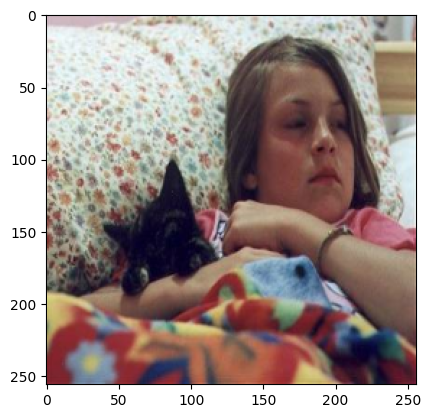

In [6]:
test_img = r'PATH_TO_ANY_IMAGE_TO_TEST_FUNCTIONS'
img = read_and_decode(test_img , RESHAPE_DIM)
print(img)
show_image(test_img)

In [40]:
#Evalaution batch size different from training will not matter
training_dataset = (tf.data.TextLineDataset(training_csv_path).skip(1).map(decode_csv)).batch(10)
eval_dataset = (tf.data.TextLineDataset(eval_csv_path).skip(1).map(decode_csv)).batch(1)
print((training_dataset))
print((eval_dataset))

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [41]:
#Take multiple images from the dataset to check if the images are valid and not corrupted
for img, label in training_dataset.take(10):
    avg = tf.math.reduce_mean(img, axis = [0, 1])
    print(label, avg)
 

tf.Tensor([1 1 0 0 1 1 1 1 1 0], shape=(10,), dtype=int64) tf.Tensor(
[[0.56269777 0.55133647 0.4980033 ]
 [0.5576787  0.547295   0.4940745 ]
 [0.5556108  0.5460887  0.49341732]
 [0.55256116 0.54354393 0.49101296]
 [0.5505942  0.5423758  0.48942652]
 [0.54670054 0.53938925 0.48568392]
 [0.5467129  0.53951067 0.48503417]
 [0.54366285 0.5359984  0.48125783]
 [0.54131246 0.5338895  0.47820935]
 [0.5402846  0.53227353 0.47649327]
 [0.54230845 0.5333677  0.47785014]
 [0.5443332  0.5352998  0.47986323]
 [0.5431206  0.5342536  0.47840232]
 [0.5421964  0.5333367  0.47713852]
 [0.54163563 0.53304446 0.47667322]
 [0.54165876 0.53301895 0.47622338]
 [0.5400755  0.5304341  0.47326794]
 [0.5400803  0.52871054 0.4709057 ]
 [0.54297805 0.5292623  0.47132856]
 [0.5463292  0.5314473  0.47412777]
 [0.5482892  0.5337638  0.47670835]
 [0.54801285 0.53450763 0.47834668]
 [0.5447742  0.5322188  0.47712365]
 [0.54127395 0.52936274 0.47494778]
 [0.5327965  0.52194226 0.4683524 ]
 [0.52500707 0.51569337 0.4626

In [42]:
#create model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(1) #Binary with sparse coded.Hence 1 output
    ]
)
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               25165952  
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25166081 (96.00 MB)
Trainable params: 25166081 (96.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:

model.compile(
    optimizer='adam',
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)


history = model.fit(training_dataset, validation_data=eval_dataset, epochs=10)

Epoch 1/10
41/41 [==============================] - 27s 605ms/step - loss: 0.6270 - accuracy: 0.8507 - val_loss: 1.9108 - val_accuracy: 0.5950
Epoch 2/10
41/41 [==============================] - 25s 602ms/step - loss: 0.2550 - accuracy: 0.8980 - val_loss: 4.0001 - val_accuracy: 0.5200
Epoch 3/10
41/41 [==============================] - 24s 590ms/step - loss: 0.4288 - accuracy: 0.8383 - val_loss: 1.9448 - val_accuracy: 0.5600
Epoch 4/10
41/41 [==============================] - 24s 596ms/step - loss: 0.2243 - accuracy: 0.9154 - val_loss: 4.3166 - val_accuracy: 0.5150
Epoch 5/10
41/41 [==============================] - 25s 602ms/step - loss: 0.3998 - accuracy: 0.8333 - val_loss: 2.4006 - val_accuracy: 0.5500
Epoch 6/10
41/41 [==============================] - 24s 593ms/step - loss: 0.2726 - accuracy: 0.8831 - val_loss: 3.9100 - val_accuracy: 0.5300
Epoch 7/10
41/41 [==============================] - 24s 596ms/step - loss: 0.5602 - accuracy: 0.7861 - val_loss: 1.5114 - val_accuracy: 0.5600

In [62]:
test_img_1 = read_and_decode(r'PATH_TO_ANY_IMAGE_TO_TEST_MODEL', RESHAPE_DIM)
#if the batch is more than 1 (batch(10)), predict the whole batch and then use index to preview the pic.
pred = model.predict(tf.reshape(test_img_1, [1, IMG_HEIGHT, IMG_WIDTH, 3]))
print(pred)

1/1 [==============================] - 0s 114ms/step
[[-9.215939]]


In [63]:
pred_prob = tf.math.sigmoid(pred)
print(pred_prob)
# Set the threshold for binary classification
threshold = 0.5
# Convert probabilities to class labels
predicted_classes = ( pred_prob.numpy() >= threshold).astype(int)
print(predicted_classes)
# use the index in CLASS_NAMES
pred_label  = CLASS_NAMES[int((predicted_classes))]
print(pred_label)

tf.Tensor([[9.9431854e-05]], shape=(1, 1), dtype=float32)
[[0]]
cats


C:\Users\moham\AppData\Local\Temp\ipykernel_22144\687089710.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label  = CLASS_NAMES[int((predicted_classes))]


In [64]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### Lessons to take note
##### Model is learning at a higher batch number as well as randomised input csv 
##### Sigmoid is for binary classification 
##### logits are natural log of the probabilities. You need sigmoid to change back those values into probablities.
##### You can set your own threshold to determine the classes.
